In [1]:
# 基本パッケージ（numpy,Pandas,matplotlib,Seaborn）
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor
# LightGBM
import lightgbm as lgb
# XGboost
import xgboost as xgb
# train_test_split（データを分割出してくれる）
from sklearn.model_selection import train_test_split
# accuracy_score（正解率を測れる）
from sklearn.metrics import accuracy_score
# グリッドサーチ（ハイパーパラメータを自動的に最適化してくれる）
from sklearn.model_selection import GridSearchCV
# 正規化、標準化用
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 特徴量選択用
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
# 交差検証用
from sklearn.model_selection import cross_val_score
# 多項式特徴量生成用
from sklearn.preprocessing import PolynomialFeatures
# モデルの保存
from sklearn.externals import joblib

D:\Program\Anaconda3\envs\sklearn1.9.1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# 表示関連
# DataFrameの列数設定
pd.set_option('display.max_columns', 500)

In [3]:
# 株価データの読み込み
stock_data = pd.read_csv("stock_Price_Prediction_v3.csv", encoding="shift-jis")

# 読み込みデータの表示
stock_data.head()

Open      High       Low    Volume  Adj Close  Open_nikkeiFuture  \
0  0.003707 -0.003666 -0.009302 -0.094736  -0.021120          -0.020709   
1 -0.016620 -0.011960 -0.002817 -0.318153   0.001876           0.005639   
2  0.010329  0.008380  0.006591  0.122653   0.013109           0.011682   
3  0.009294  0.023084  0.015903  4.463222   0.022181           0.018938   
4  0.022099  0.023466  0.022099 -0.041229   0.020796           0.026292   

   High_nikkeiFuture  Low_nikkeiFuture  Adj Close_nikkeiFuture  Open000001.SS  \
0          -0.019761         -0.019861               -0.014781      -0.028952   
1           0.006564          0.006598                0.006564       0.005530   
2           0.012110          0.009831                0.012110      -0.025220   
3           0.022549          0.021326                0.017027       0.009043   
4           0.024302          0.024966                0.029864       0.011441   

   High000001.SS  Low000001.SS  Adj Close000001.SS  Open^AORD  High^AORD  \
0      -0.027300     -0.018274            0.000382  -0.003697  -0.001282   
1       0.010371     -0.004536           -0.020755   0.001227   0.002746   
2      -0.026582     -0.008432            0.004563   0.004394   0.004019   
3       0.012099      0.017312            0.012187   0.000000   0.000000   
4       0.008802      0.002595            0.008772   0.010772   0.010288   

   Low^AORD  Adj Close^AORD  Open^AXJO  High^AXJO  Low^AXJO  Adj Close^AXJO  \
0 -0.001347        0.000688  -0.003894  -0.000719 -0.001714        0.001142   
1  0.002397        0.003466   0.001774   0.003477  0.003162        0.004231   
2  0.004454        0.004288   0.005373   0.003853  0.005223        0.004123   
3  0.000000        0.000000   0.000000   0.000000  0.000000        0.000000   
4  0.010863        0.007620   0.011852   0.011515  0.011945        0.008867   

   Open^BFX  High^BFX   Low^BFX  Adj Close^BFX  Open^BSESN  High^BSESN  \
0  0.004074 -0.002879 -0.004032      -0.006777   -0.031143   -0.021630   
1 -0.005913 -0.004600 -0.000511      -0.000222    0.010547   -0.000237   
2  0.000533  0.000201  0.001135      -0.001502   -0.018612   -0.004086   
3  0.001712  0.003650  0.001968       0.004238   -0.007802   -0.006992   
4  0.002363  0.000771 -0.000481       0.000048    0.009555    0.026087   

   Low^BSESN  Adj Close^BSESN  Open^BVSP  High^BVSP  Low^BVSP  Adj Close^BVSP  \
0  -0.012943         0.006388   0.000000   0.000000  0.000000        0.000000   
1   0.000004        -0.020279   0.018712   0.018274  0.062164        0.012748   
2  -0.009016        -0.009083   0.012511  -0.005706 -0.007544       -0.007358   
3  -0.000840         0.018033  -0.007081   0.006803  0.012653        0.014219   
4   0.017591         0.027465   0.014262   0.035532  0.014593        0.034199   

   Open^DJI  High^DJI   Low^DJI  Adj Close^DJI  Open^FCHI  High^FCHI  \
0 -0.000942 -0.000737 -0.003668      -0.004076  -0.003132  -0.006026   
1 -0.004049 -0.002026  0.003647       0.003336  -0.010076  -0.006448   
2  0.002986 -0.000322 -0.001964      -0.002026   0.008125   0.003951   
3 -0.001565  0.003790  0.002306       0.000357   0.003804   0.009390   
4  0.000066  0.004054  0.001760       0.008902  -0.000278  -0.001154   

   Low^FCHI  Adj Close^FCHI  Open^GDAXI  High^GDAXI  Low^GDAXI  \
0 -0.016358       -0.012787   -0.001522   -0.009296  -0.023954   
1  0.001988        0.005210   -0.018341   -0.014720  -0.001880   
2  0.007281        0.003203    0.003779    0.002814   0.003381   
3  0.006625        0.002948    0.004733    0.008278   0.011100   
4  0.002150        0.006289   -0.000291    0.002102   0.002061   

   Adj Close^GDAXI  Open^GSPC   High^GSPC   Low^GSPC   Adj Close^GSPC   \
0        -0.018996   -0.002727   -0.001875  -0.002243        -0.001665   
1         0.000982   -0.001665    0.000612   0.003993         0.004021   
2         0.003121    0.004021    0.001738  -0.000298         0.001084   
3         0.002582    0.001862    0.003879   0.002793         0.000026   
4    

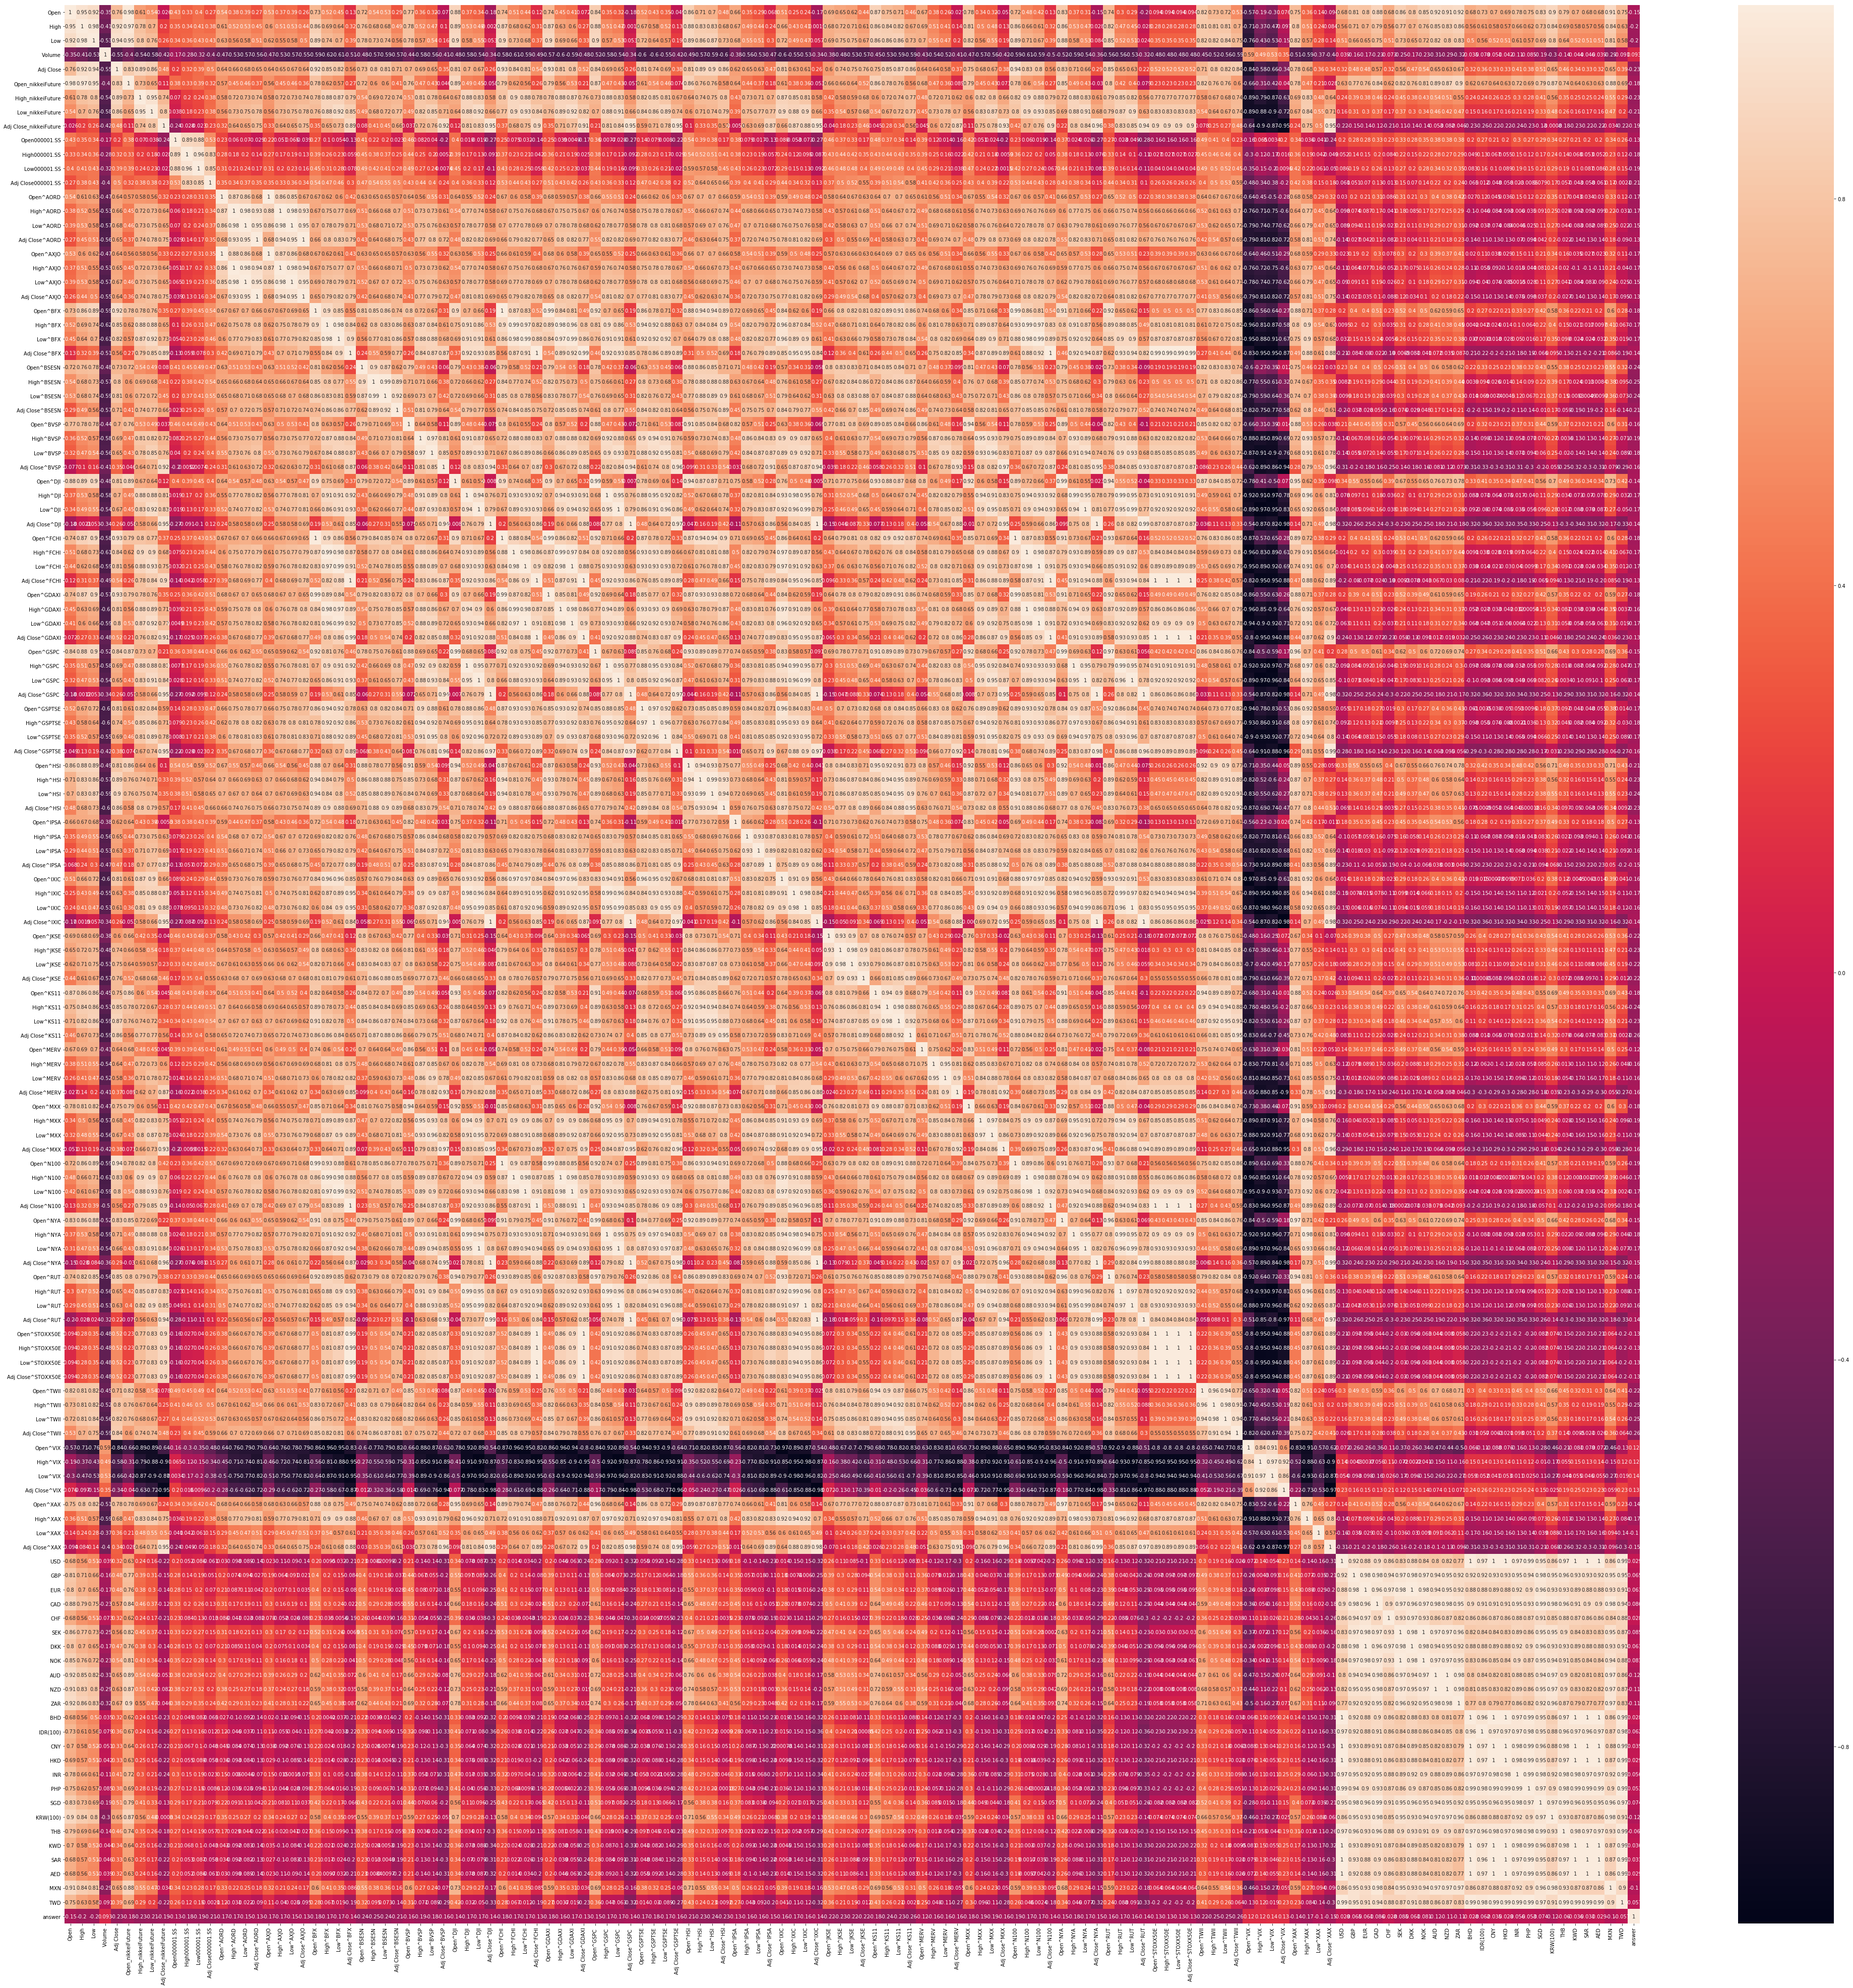

In [4]:
# 相関係数の出力
correlation_coefficient = stock_data.corr()
f, ax = plt.subplots(figsize=(70, 70))
sns.heatmap(correlation_coefficient.corr(),annot=True)
plt.show()
## CSVへ出力
correlation_coefficient.to_csv('correlation_coefficient.csv')

In [5]:
# 目的変数の変換
answers = stock_data['answer']
# 目的変数を削除
stock_data.drop(columns=['answer'], inplace=True)

In [6]:
# ランダムフォレストによる学習
rf = joblib.load('rf.pkl')
rf.fit(stock_data, answers)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

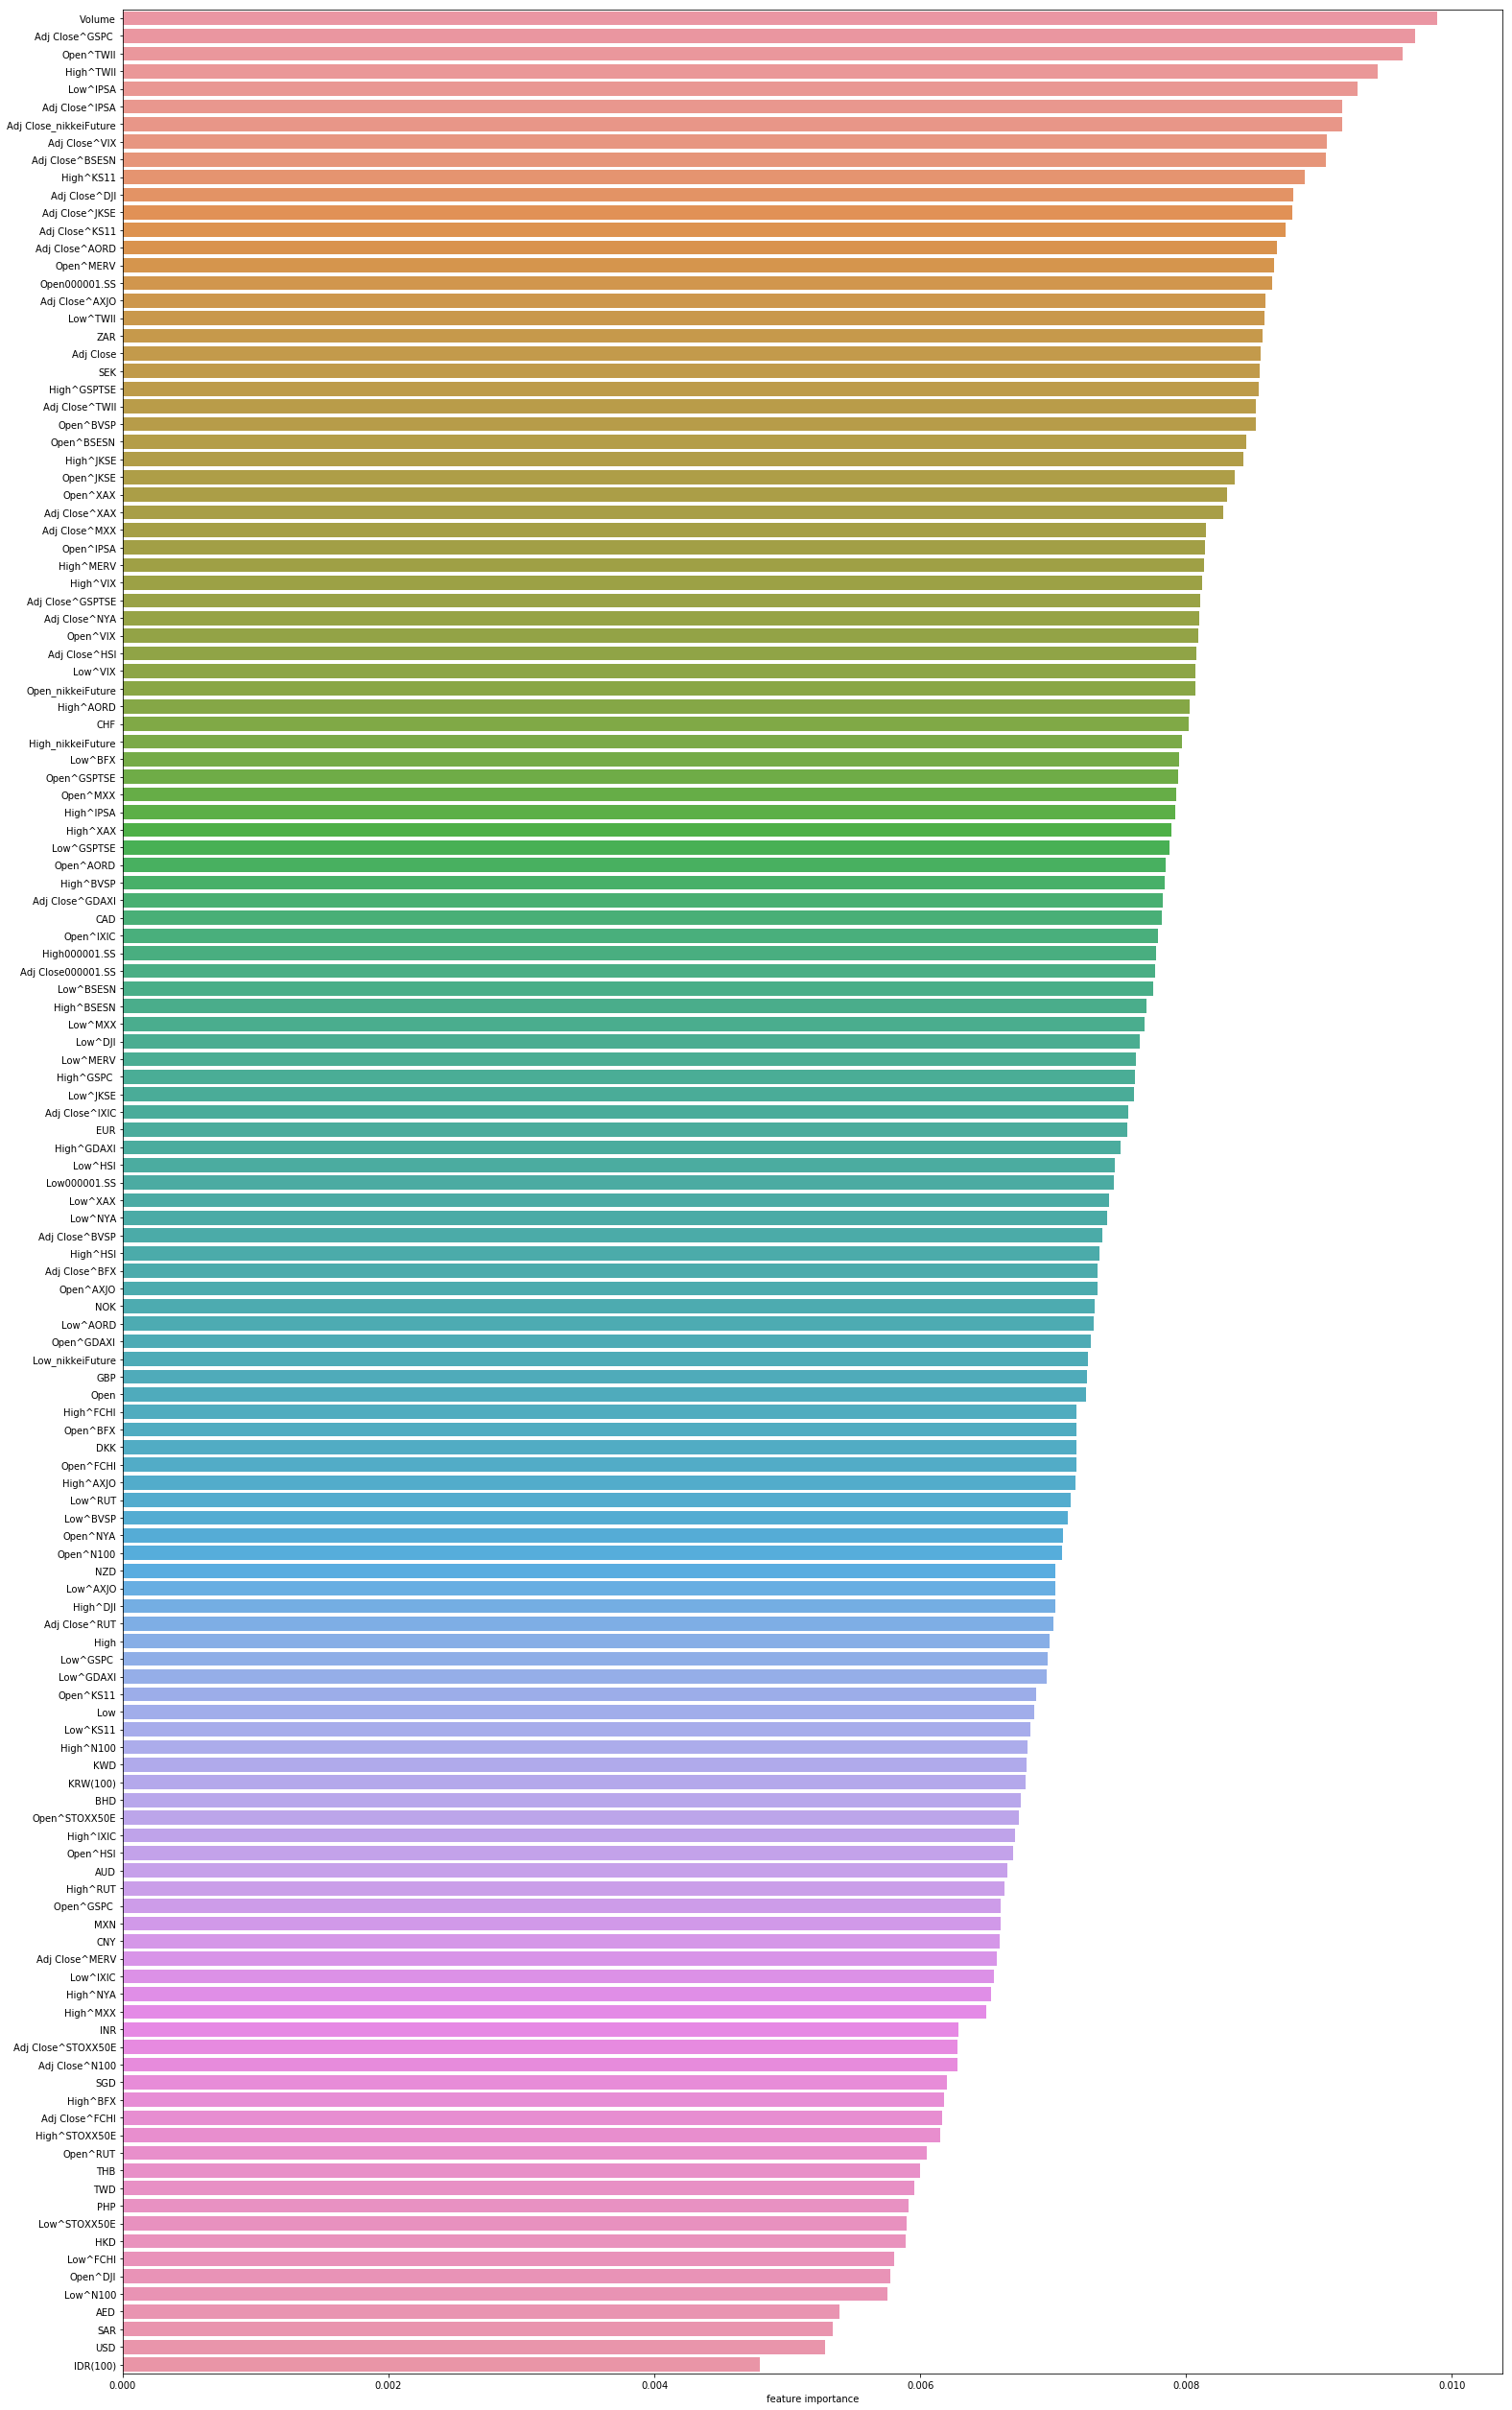

In [7]:
# 特徴量の重要度を確認
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(22, 35))
sns.barplot(x=rf.feature_importances_[ranking], y=stock_data.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [8]:
# LightGBMによる学習
lgbm = joblib.load('lgbm.pkl')
lgbm.fit(stock_data, answers)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.6,
        learning_rate=0.05, max_depth=3, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=1,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.5,
        subsample_for_bin=200000, subsample_freq=0)

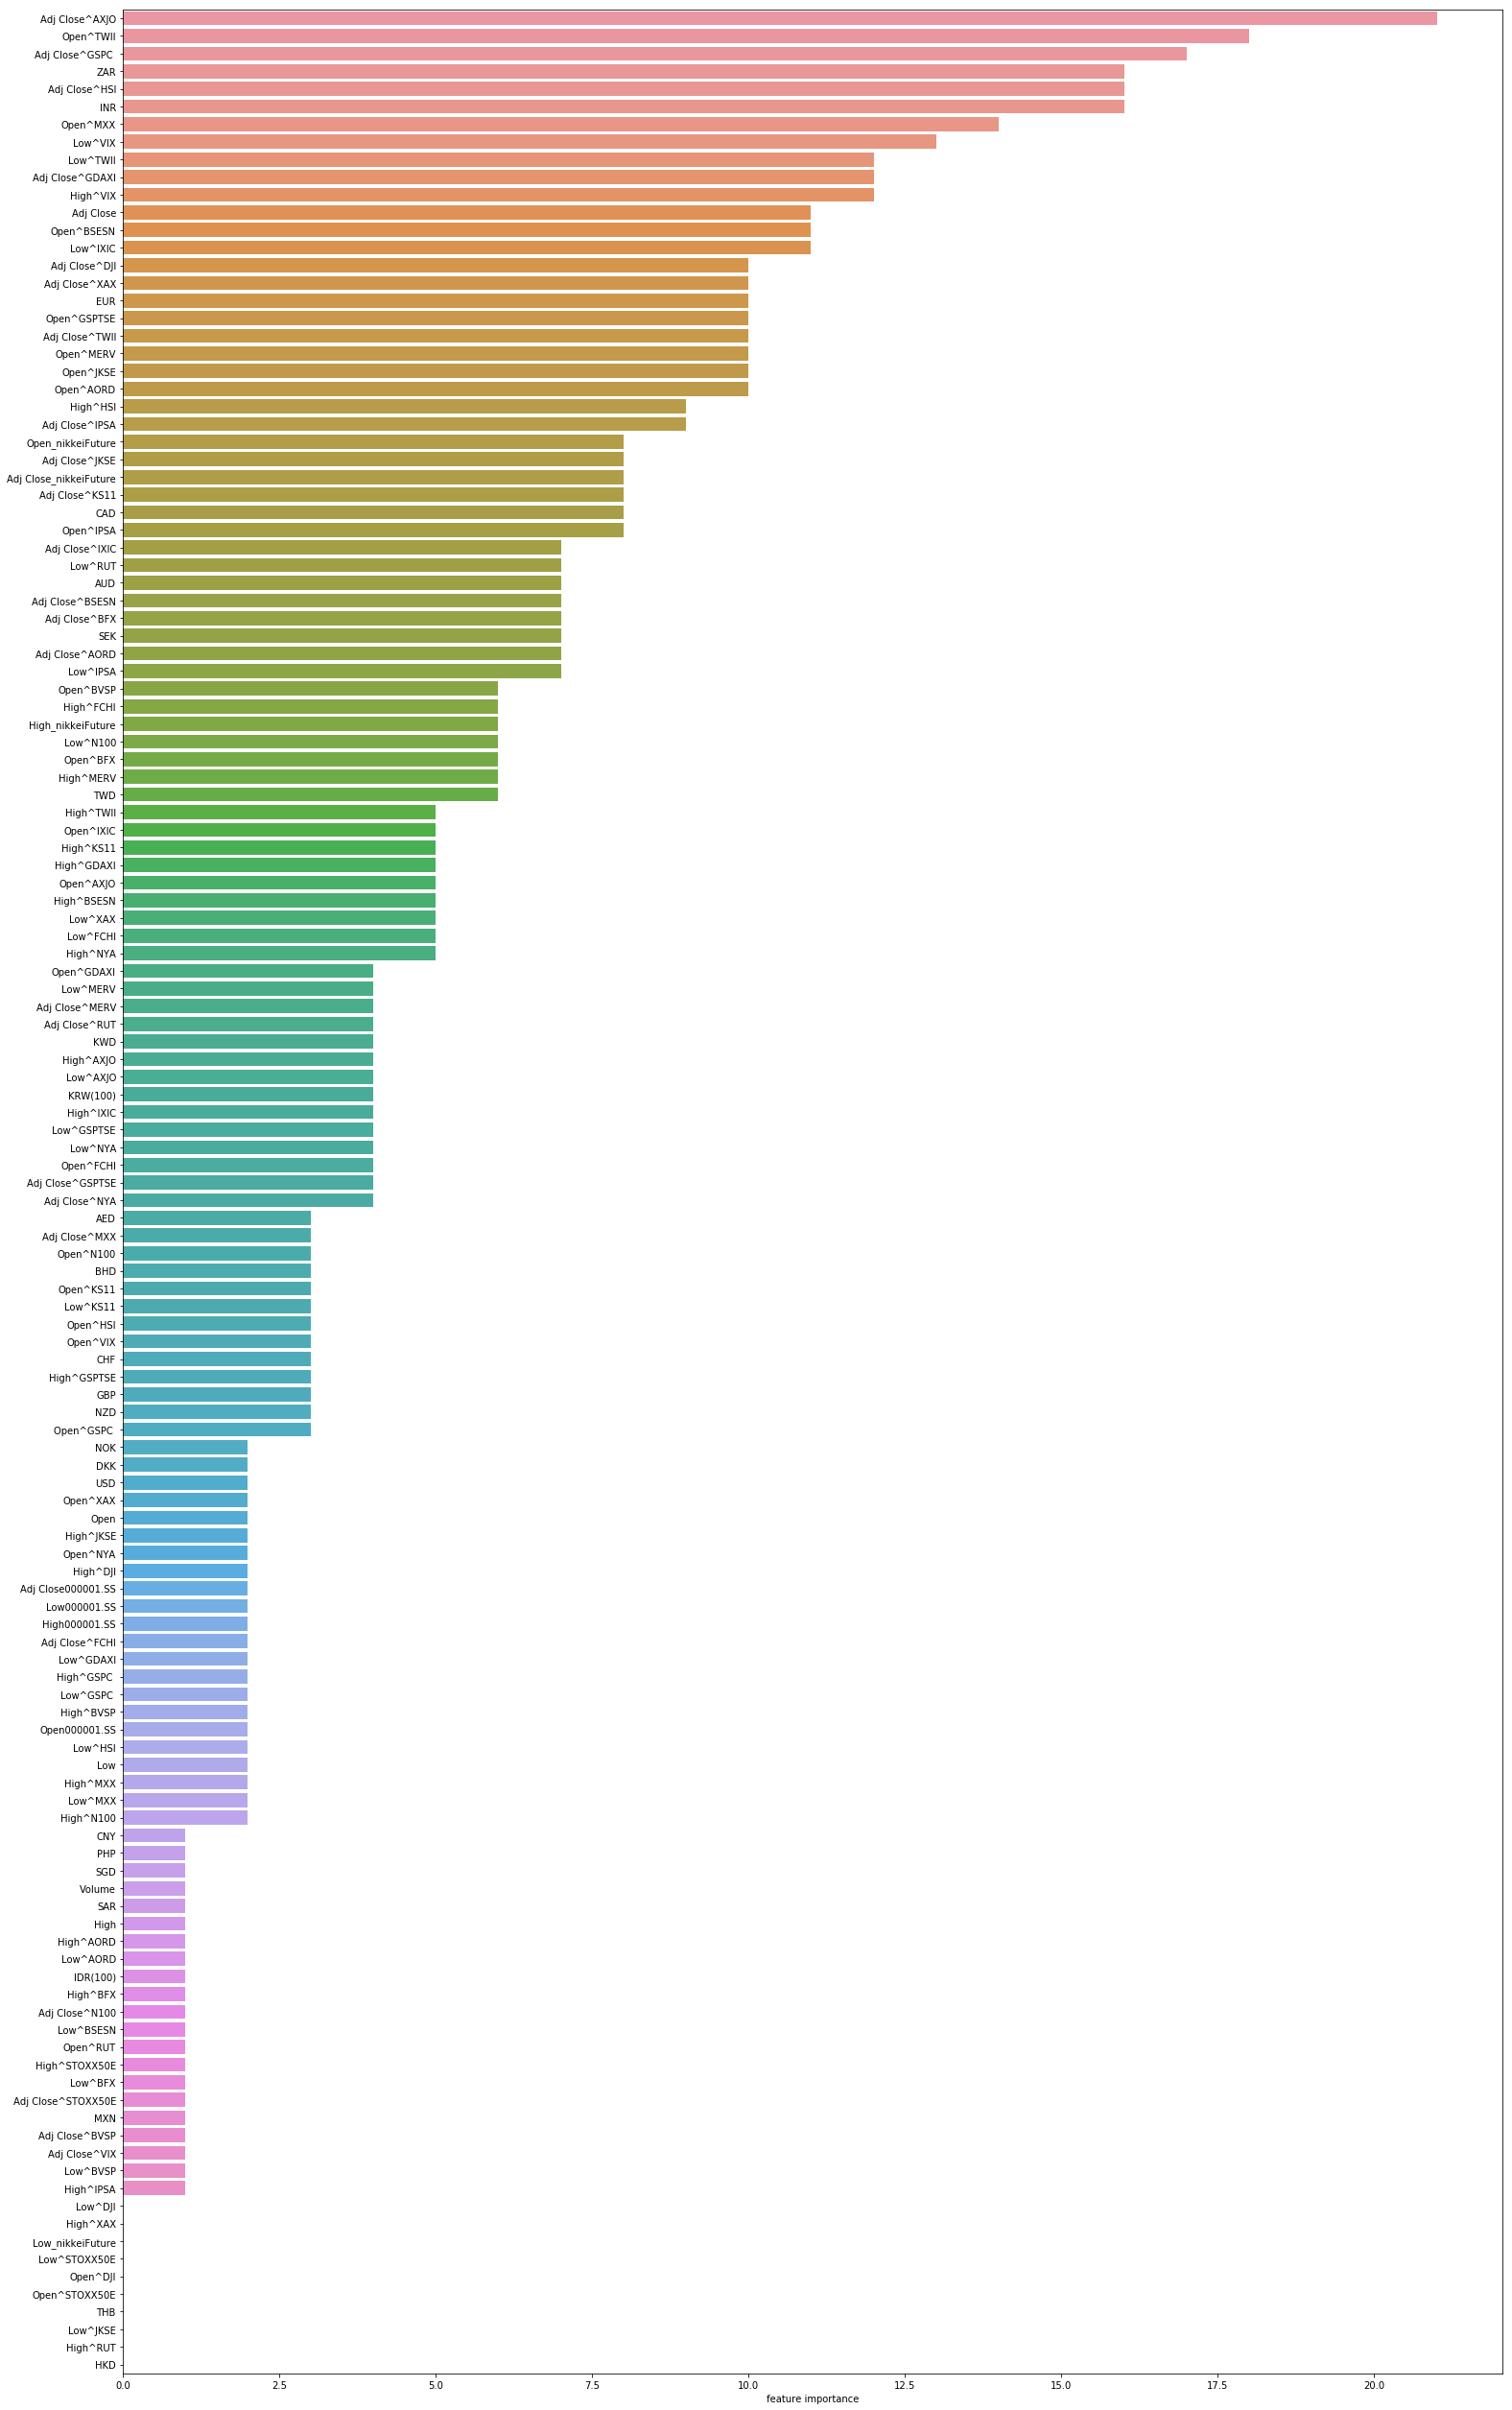

In [9]:
# 特徴量の重要度を確認
ranking = np.argsort(-lgbm.feature_importances_)
f, ax = plt.subplots(figsize=(22, 35))
sns.barplot(x=lgbm.feature_importances_[ranking], y=stock_data.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [10]:
# XGboostによる学習
xg = joblib.load('xgb.pkl')
xg.fit(stock_data, answers)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=nan, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.5)

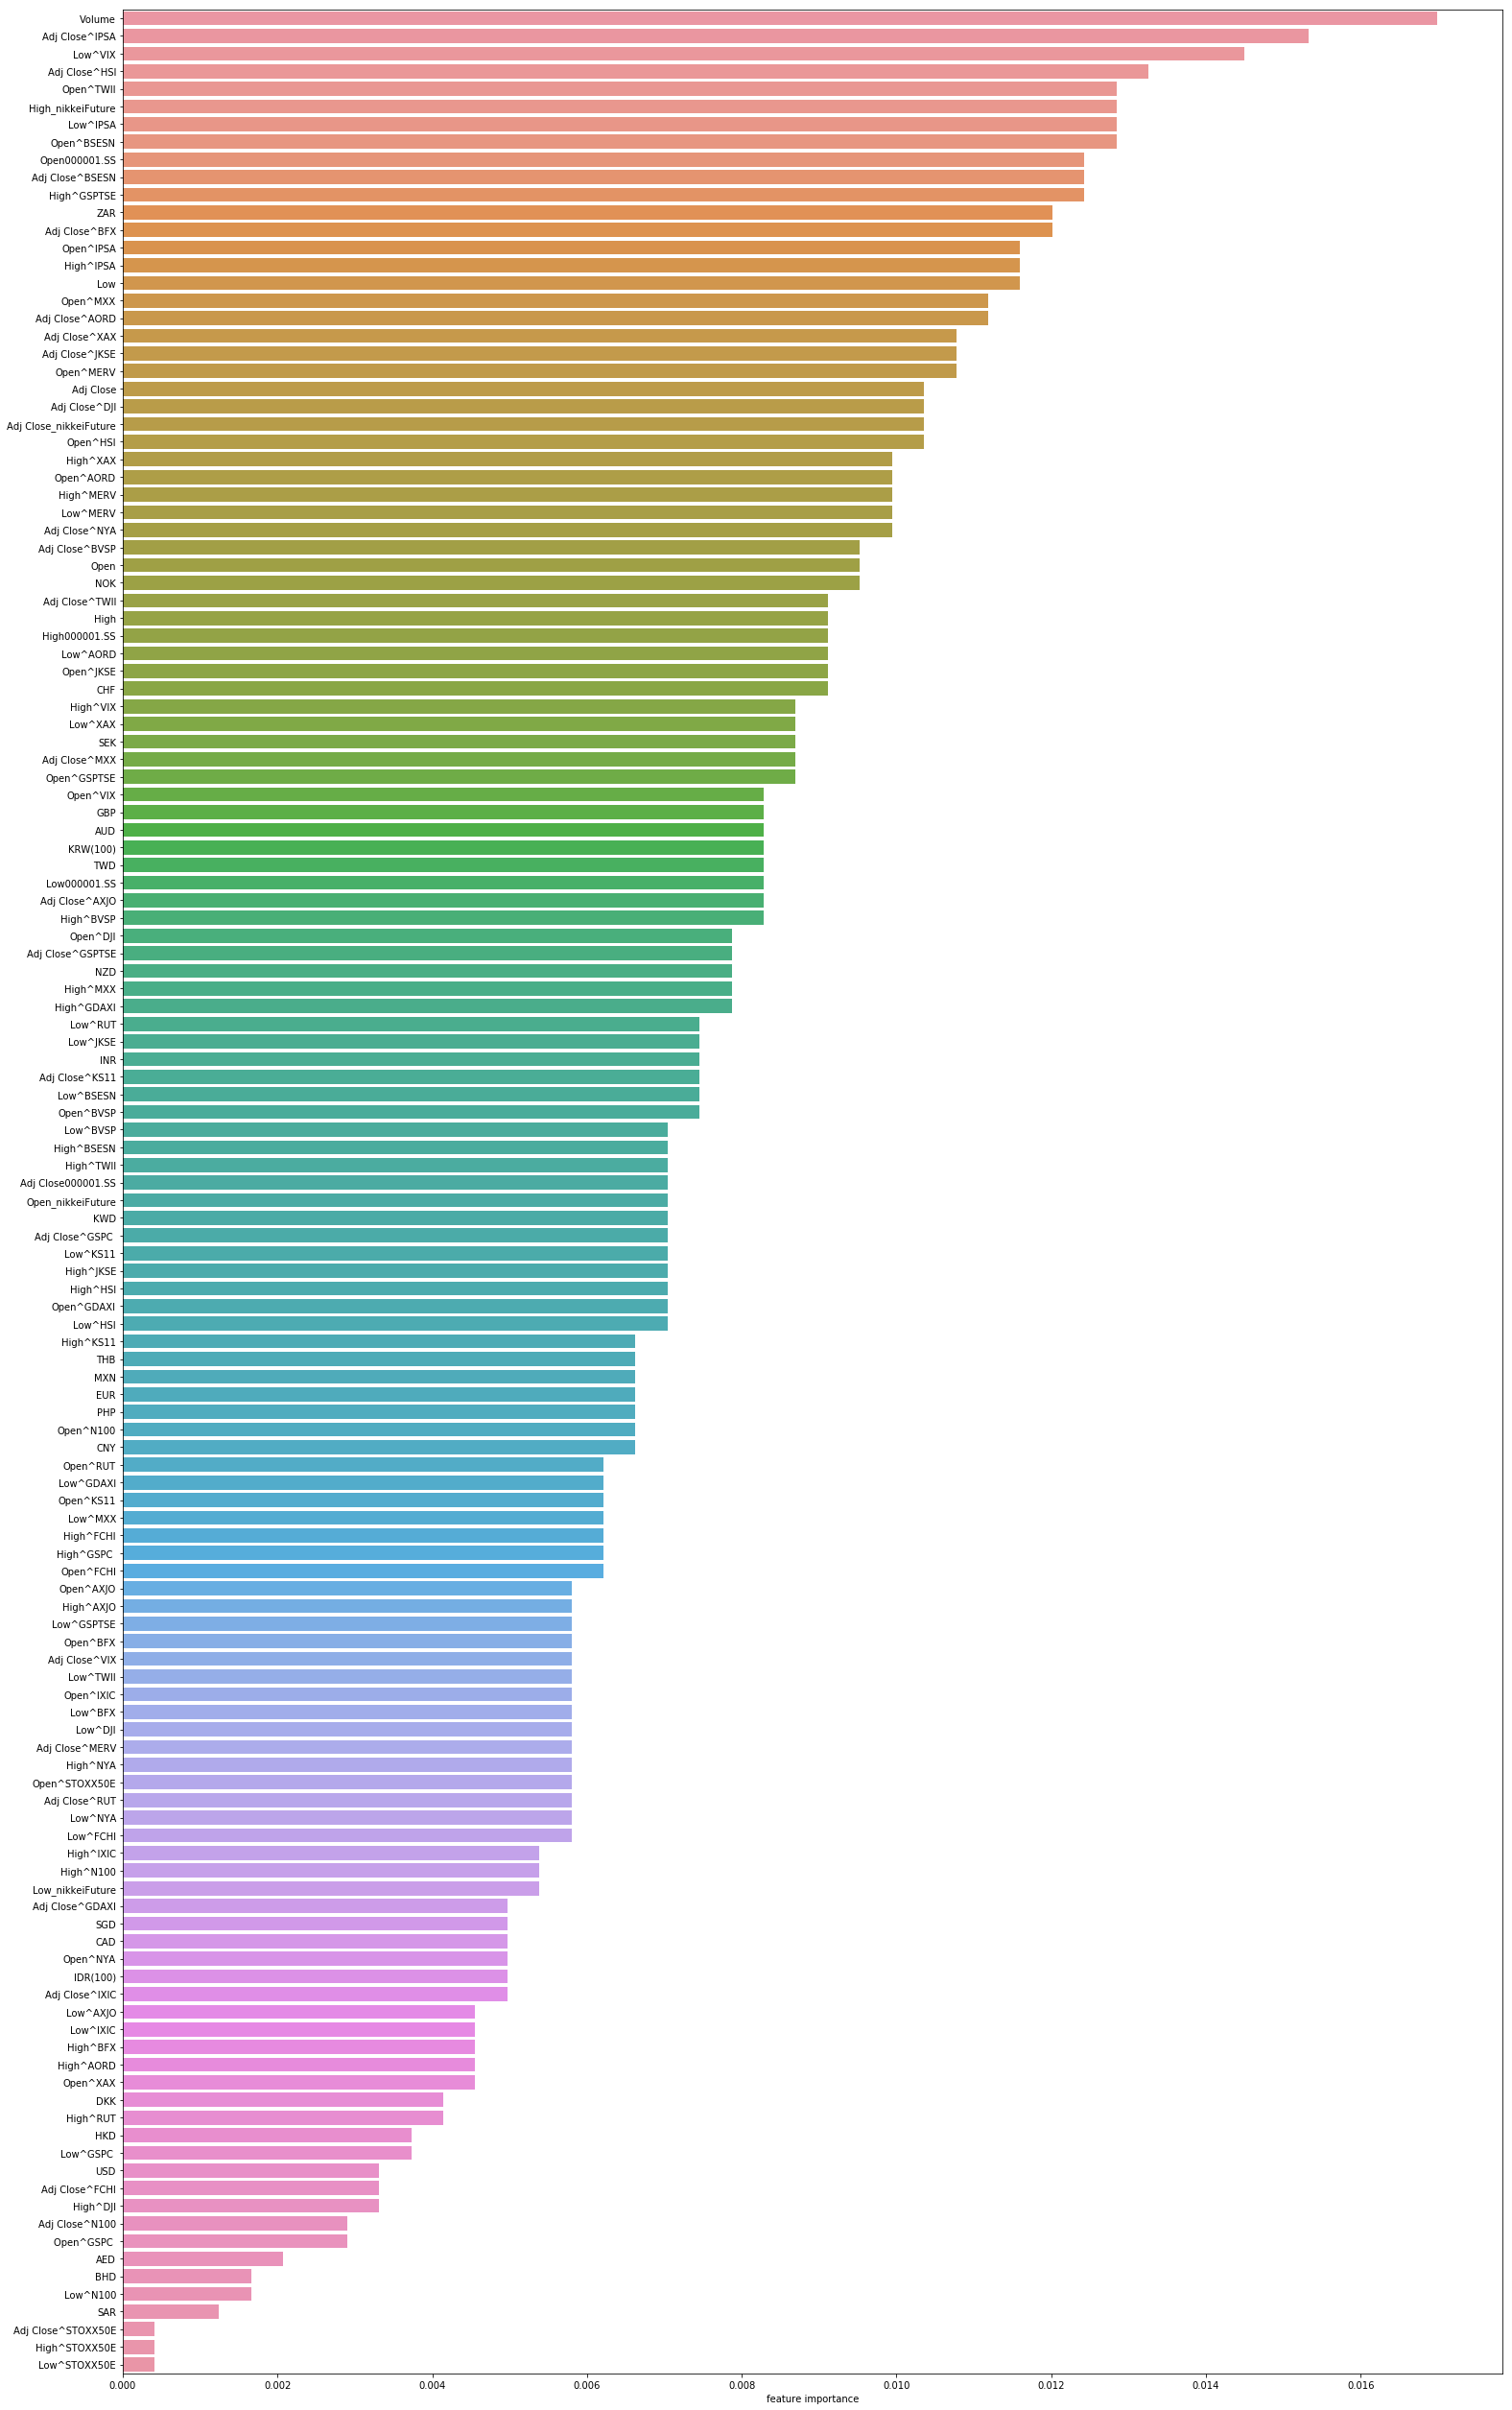

In [11]:
# 特徴量の重要度を確認
ranking = np.argsort(-xg.feature_importances_)

f, ax = plt.subplots(figsize=(22, 35))
sns.barplot(x=xg.feature_importances_[ranking], y=stock_data.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()